### Dataset - Normalized with Min-max method / Without Redshift

#### Random Forest algorithm 

In [244]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
# to import evaluation metrices

In [245]:
df_mm_wr = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_wr.csv")

In [246]:
df_mm_wr

,alpha,delta,u,g,r,i,z,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0
...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,2


In [247]:
x = df_mm_wr.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723


In [248]:
y = df_mm_wr["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [249]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [250]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [251]:
y_pred = model_rf.predict(x_test)


In [252]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1715,   77,  104],
       [ 131, 1620,  145],
       [ 169,  228, 1500]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

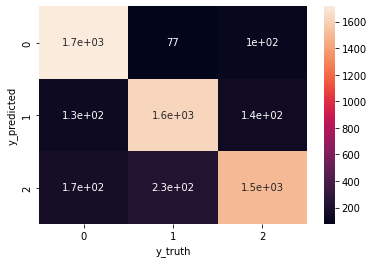

In [253]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [254]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8498857444190543
Precision: 0.8501026666577488
Recall: 0.8498961458873179
F1 Score: 0.8492595479199906


#### Support Vector Machine (SVM) algorithm

In [256]:
from sklearn.svm import SVC #importing SVC class

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [257]:
y_pred = model_svm.predict(x_test)

In [258]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1083,  173,  640],
       [ 109, 1543,  244],
       [ 385,  542,  970]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

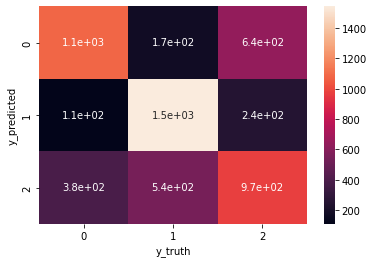

In [259]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [260]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6320970293548954
Precision: 0.6310960598734378
Recall: 0.6321182606039443
F1 Score: 0.6279207080090852


#### Extremely Randomized Trees (ERT) algorithm

In [262]:
from sklearn.ensemble import ExtraTreesClassifier #importing extra trees classifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [263]:
y_pred = model_ert.predict(x_test)

In [264]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1722,   76,   98],
       [ 142, 1610,  144],
       [ 197,  253, 1447]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

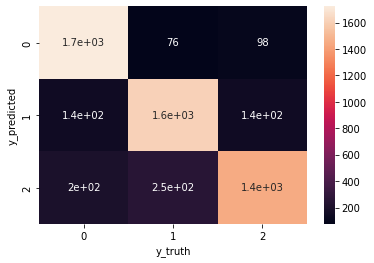

In [265]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [266]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8400421866760415
Precision: 0.840853867276286
Recall: 0.8400557694546205
F1 Score: 0.8390062001276757


####  Decision Tree algorithm

In [268]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [269]:
y_pred = model_dt.predict(x_test)

In [270]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1507,  165,  224],
       [ 182, 1450,  264],
       [ 226,  248, 1423]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

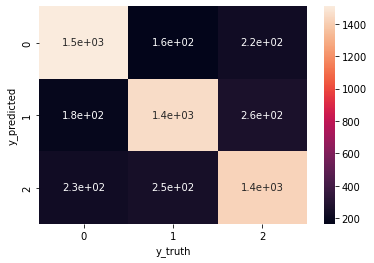

In [271]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [272]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.769906837757075
Precision: 0.7699653440693899
Recall: 0.769910314383433
F1 Score: 0.7699080883631849


#### KNN algorithm

In [274]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [275]:
y_pred = model_knn.predict(x_test)

In [276]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1563,  130,  203],
       [ 196, 1455,  245],
       [ 391,  489, 1017]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

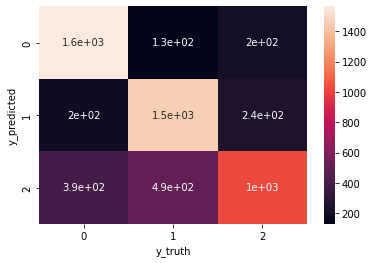

In [277]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [278]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7092634909474425
Precision: 0.7075725362171141
Recall: 0.7092939329031628
F1 Score: 0.7035364783375316
